<div style="background-color: #002676; padding: 20px;">
<img src="https://macss.berkeley.edu/wp-content/uploads/2023/09/UCBMaCSS_Logo_2Color_Reverse_TaglineB.png" alt="MaCSS" width="300">
</div>

# **Notebook 3:** Data Analysis

[wdtmacss@berkeley.edu](mailto:wdtmacss@berkeley.edu)\
**Computational Social Science 1A**\
[Human Psychology and Social Technologies](https://classes.berkeley.edu/content/2024-fall-compss-214a-001-lec-001) 
Fall 2024\
UC Berkeley [Masters in Computational Social Science](https://macss.berkeley.edu/about/)

**Week 4:** Difference in Differences analysis. Simulating a dataset & performing regressions in Python.

👩🏾‍🔬🧑‍💻👩🏻‍💻👨🏿‍💻🔬

---

# Table of Contents
1. [Announcements](#announcements)
2. [Summary of Today's Class](#summary-of-todays-class)
3. [An Introduction to Difference in Differences Analysis](#an-introduction-to-difference-in-differences-analysis)
   - [Simple conceptual example # 1: two lemon trees](#simple-conceptual-example-#1-two-lemon-trees)
   - [Simple conceptual example # 2: Remote Work vs. In-Office Work](#simple-conceptual-example-#2-remote-work-vs-in-office-work)
5. [DiD Analysis: A Minimal Working Example, Implemented](#did-analysis-a-minimal-working-example-implemented)
   - [Simulating a Dataset](#simulating-a-dataset)
     - [Simulation Parameters](#simulation-parameters)
       - [Employee Satisfaction Parameters](#employee-satisfaction-parameters)
       - [Time Window Parameters](#time-window-parameters)
       - [Treatment Effect Parameters](#treatment-effect-parameters)
     - [Data Simulation](#data-simulation)
       - [Data Simulation Challenge 1: Treatment Effect](#data-simulation-challenge-1-treatment-effect)
       - [Data Simulation Challenge 2: Onset Date](#data-simulation-challenge-2-onset-date)
   - [Analysing the Simulated Dataset](#analysing-the-dataset)
     - [Understanding the Regression Results](#understanding-the-regression-results)
   - [Data Analysis Challenge 1: Treatment Effect](#data-analysis-challenge-1-treatment-effect)
   - [Data Analysis Challenge 2: Baseline Satisfaction Levels](#data-analysis-challenge-2-baseline-satisfaction-levels)
   - [Data Analysis Challenge: Explore Additional Variables](#data-analysis-challenge-explore-additional-variables)

---

# Announcments
*  Next week's lab session: do people want another week on this topic? I will poll the class at the end of the lesson today.
*  Questions?

# Summary of Today's Class
The goal today is to become familiar with a Difference in Differences (DiD) analysis.

**Today we will:** 
*  Discuss DiD analysis and the situations in which it cna be useful
*  Simulate a dataset with the same structure as the McCabe dataset
*  Perform DiD analyses on the simulated dataset

Today's programming exercises are designed to introduce you to DiD analyses in particular, and to the practice of simulating data as a way to gain a deeper, more practical understanding of data analysis methods in general. DiD analyses can be expressed as simple linear regressions, so today's exceersises are also designed to provide hands on practice in the domain of regression analysis -- arguably the core tool of data science and a vital skill for any data analyst.  

**Functionality we will cover today:**
*   Simulating a dataset
    *   Pandas Dataframes
    *   Radomness via Numpy    
*   Regression analysis in Python using [statsmodels](https://www.statsmodels.org/stable/index.html)
    *  Linear regression
    *  Regression formulas
    *  Interaction terms
    *  Reading a regression results table  
*   [Seaborn lineplots](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

---
# An Introduction to Difference in Differences Analysis 
Let's start with some examples.

## Simple conceptual example #1: Two lemon trees
<img src="https://m.media-amazon.com/images/I/71ncCcZ5gcL.jpg" alt="two lemon trees" width="300">
Here are two lemon trees!

*  **2022** In 2022 (timepoint one), the tree on the left made 14 lemons, the tree on the right made 8 lemons
*  **Fertilizer:** At the end of 2022, the tree on the left was given fertilizer (the **treatment**). The tree on the right was not (**control**). 
*  **2023** In 2022 (timepoint two), the tree on the left made 17 lemons, the tree on the right made 11 lemons

**Did the fertilizer work?**
Difference in differences is calculated as follows:
*  The tree on the left produced 14 lemons in the first year and 17 lemons in the second. So the difference between the first and the second year is `17 - 14 = +3`.
*  The tree on the right produced 8 lemons in the first year and 9 lemons in the second. So the difference between the first and the second year is `11 - 9 = +2`.
*  So the **difference** between these differences is `3 - 2 = +1`.
*  So we conclude that the fertilizer led to one more lemon than expected (relative to the change observed in the control group)

**Questions?** Is there anyting you think is weak about this analysis? In what circumstances would it give us the wrong conclusion? How would it generalize to more complex sets of multiple measurements over time?


## Simple conceptual example #2: Remote Work vs. In-Office Work 
**Class discussion of an example:** Two comparable companies, one started to allow remote work, the other didn't. Employee satisfaction is measured over time at both companies, before and after the onset of remote work.

## A more technical definition
Two groups, measured over time. One group is subject to an intervention during the measurement window, the other group is not. DiD analysis allows you to examine whether the intervention was assosciated with an effect on an outcome variable by comparing differences in the change in the outcome pre- and post- intervention between groups. Here is the [wikipedia page on DiD](https://en.wikipedia.org/wiki/Difference_in_differences). The key question that this analysis answers is whether the treamtent group experienced significantly more or less *change* than is expected relative to the change that occured in the control group.

---

# **DiD Analysis:** A Minimal Working Example, Implemented. 
1. First we will simulate a dataset. The process of simulating a dataset can be very helpful in understanding the key dimensions of an analysis conceptually, and allows you to asses how well the resulting analysis recovers the underlying true structure of the data -- because you created the data.

2. Second, we will perform a difference in differences analysis on simulated datasets. 

## Simulating a Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Simulation Parameters
Below, we'll define a few parameters we need to simulate a dataset of `employee_satisfaction` scores in the context of the remote work "treatment". These parameters of of course completely made up, but we need to commit to some specific numbers in order to simulate data.  

#### Employee Satisfaction Parameters
We'll simulate data by assuming there is an average `employee_satisfaction` score for each company. When generating data for each simulated employee, we will take the average and add noise to it so that the dataset includes some random variability.

In [105]:
def employee_satisfaction(satisfactions=[5.2, 6.1], num_employees_per_company=[50,50]):
    # Mean employee_satisfaction levels for both companies
    company_profiles = {
        "Rubicon": {
            "employee_satisfaction": satisfactions[0], # satisfaction on a scale of 1 to 10
            "employee_num": num_employees_per_company[0]
        },
        "Giggle": {
            "employee_satisfaction": satisfactions[1], # satisfaction on a scale of 1 to 10
            "employee_num": num_employees_per_company[1]
        },
    }
    return company_profiles

company_profiles = employee_satisfaction()

# number of  employees we will simulate per company in our simulated dataset
# num_employees_per_company = 50

# We will add noise to the employee_satisfaction means when simulating data
# A larger number here means more noise
# satisfaction_variance = 1 

#### Time window parameters
Our dataset needs to simulate a specific time window for data collection. We can use Pandas `datetime` functionality again to do this.

In [106]:
def generate_dates(frequency='W'):
    # Define a data collection time window
    data_collection_start_date = pd.to_datetime("2022-01-01")
    data_collection_end_date = pd.to_datetime("2023-12-31")

    # Create an array of dates on which to simulate collection of satisfaction data
    dates = pd.date_range(
        start=data_collection_start_date, 
        end=data_collection_end_date, 
        freq=frequency # weekly intervals between start and end
    )
    return dates

dates = generate_dates()
dates

DatetimeIndex(['2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20',
               '2022-02-27', '2022-03-06',
               ...
               '2023-10-29', '2023-11-05', '2023-11-12', '2023-11-19',
               '2023-11-26', '2023-12-03', '2023-12-10', '2023-12-17',
               '2023-12-24', '2023-12-31'],
              dtype='datetime64[ns]', length=105, freq='W-SUN')

#### Treatment effect parameters
How does remote work effect satisfaction? Here's where we define the key effect of the treatment in our data. When simulating data, we will sample baseline `employee_satisfaction` scores from the company average, then add or subtract from the samples a `remote_work_treatment_effect`. 

For example, if our assumption is that remote work improved `employee_satisfaction` here, we would add a positive number to the score (i.e. we would set the `remote_work_treatment_effect` variable to a positive number). We could alternatively assume it had a negative effect, and set the `remote_work_treatment_effect` variable to a negative number. 

We also need to specifcy the time at which the `treatment` occurred, so that we can distinguish score that are before and after the treatment when simulating data. 

In [95]:
remote_work_onset_date = pd.to_datetime("2023-01-01")

### Data simulation
Now we have the parameters defined, we can simulate a dataset. We'll assume that `Giggle` is the company who allowed remote work after `remote_work_onset_date`, and `Rubicon` did not allow remote work.

The code block below (heavily commented) generates a simulated dataset by looping (`iterating`) over the relevant companies, dates, and number of employees and generating a satisfaction score. **Our goal is to simulate a satisfaction socre for every employee on every date included in the data collection window**. Specifically, we need to generate simulated satisfaction scores in a way that reflects the effects of remote work, and the fact that only one company allowed remote work, and only after a certain date.

Work through this code block and make sure you understand what every line is doing. **First read the code directly, then read the comments** for any lines that aren't clear.

In [107]:
# create an empty list to store our simulated data
def create_company_profiles(remote_work_treatment_effect=2, frequency='W', satisfactions=[5.2, 6.1], satisfaction_variance=1, onset_date='2023-01-01', num_employees=[50,50]):
    dates = generate_dates(frequency)

    company_profiles = employee_satisfaction(satisfactions, num_employees)

    remote_work_onset_date = pd.to_datetime(onset_date)

    num_employees_per_company = 50

    data = []

    # iterate over the company_profiles
    for company, profile in company_profiles.items():
        mean_satisfaction = profile["employee_satisfaction"]
        num_employees_per_company = profile["employee_num"]

        # print(f"Simulating {company} Data")
        
        # iterate over the date range
        for date in dates:

            # iterate over the number of employees
            for i in range(num_employees_per_company):
                
                # sample an initial satisfaction level 
                # by using the company average and adding noise 
                satisfaction = mean_satisfaction + np.random.normal(0, satisfaction_variance)
                
                # add in the treatment effect
                if date > remote_work_onset_date:
                    if company == "Giggle":
                        satisfaction += remote_work_treatment_effect 
                
                # create the datapoint for our dataset
                datapoint = {
                    "date": date, 
                    "company": company,
                    "satisfaction": satisfaction,
                    "employee_id": f"{company[0]}{i}" # create a fake employee id by combining the company name initial letter and the loop index variable
                } 
                data.append(datapoint)
    return pd.DataFrame(data)

df = create_company_profiles()
df

,date,company,satisfaction,employee_id
0,2022-01-02,Rubicon,5.614157,R0
1,2022-01-02,Rubicon,5.120912,R1
2,2022-01-02,Rubicon,4.385816,R2
3,2022-01-02,Rubicon,5.854653,R3
4,2022-01-02,Rubicon,5.365435,R4
...,...,...,...,...
10495,2023-12-31,Giggle,7.632185,G45
10496,2023-12-31,Giggle,8.333513,G46
10497,2023-12-31,Giggle,8.074717,G47
10498,2023-12-31,Giggle,7.225294,G48


Let's put the data we just generated into a pandas dataframe, and take a look at a sample from the dataframe to make sure it is structured as we intended.

In [22]:
df.sample(n=10)

,date,company,satisfaction,employee_id
6626,2022-07-10,Giggle,6.005597,G26
4374,2023-09-03,Rubicon,6.217410,R24
4280,2023-08-20,Rubicon,4.451603,R30
10075,2023-11-05,Giggle,8.138688,G25
6,2022-01-02,Rubicon,5.582229,R6
8139,2023-02-05,Giggle,7.736820,G39
1836,2022-09-11,Rubicon,4.768101,R36
5442,2022-01-23,Giggle,7.737414,G42
8741,2023-04-30,Giggle,8.381893,G41
4193,2023-08-06,Rubicon,4.270417,R43


Ok, finally let's plot the simulated datset as a time series line plot, with `date` on the x axis, `employee_satisfaction` on the y axis, and use color to seperate satisfaction scores between the two companies. 

We can use [seaborn line plot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to do this easily. The [Seaborn](https://seaborn.pydata.org/) library is amazing. Seaborn plots generally accept a `data` argument (a pandas dataframe) and `x` and `y` arguments that are names of columns on the dataframe, plus a `hue` variable (also the name of a column in the dataframe) that allows you to seperate out the data.

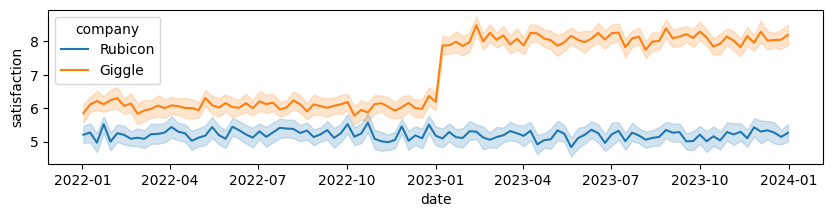

In [108]:
def plot_did(remote_work_treatment_effect=2, frequency='W', satisfactions=[5.2, 6.1], satisfaction_variance=1, onset_date='2023-01-01', num_employees=[50,50]):
    df = create_company_profiles(remote_work_treatment_effect, frequency, satisfactions, satisfaction_variance, onset_date, num_employees)

    plt.figure(figsize=(10, 2)) # make the figure size wide (10) and shallow (2)

    sns.lineplot(data=df, x="date", y="satisfaction", hue="company")

    plt.show()

plot_did()

The figure above should clearly indicate a change in employee satisfaction in the direction specified by the `remote_work_treatment_effect` variable at the date specified by the `remote_work_onset_date` variable. Does it work?  

### Data Simulation Challenge 1: treatment effect
Edit the code above to **change the treatment effect** (the impact of remote work). Change the relevant variable, re-reun the code blocks until the graph, and see how the time series changes. Try making the treatment effect:
*   Stronger
*   Weaker
*   Negative
*   Null (i.e. no effect)

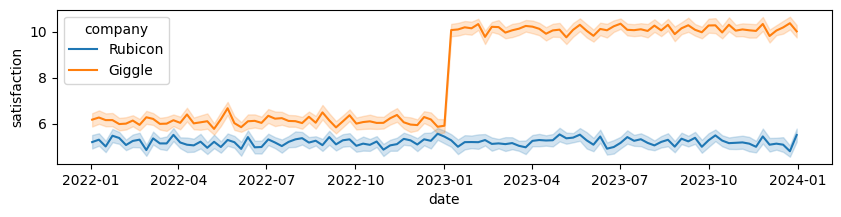

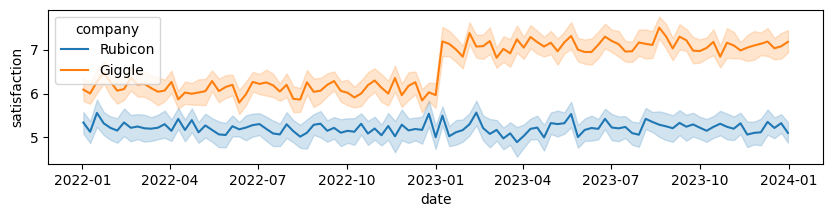

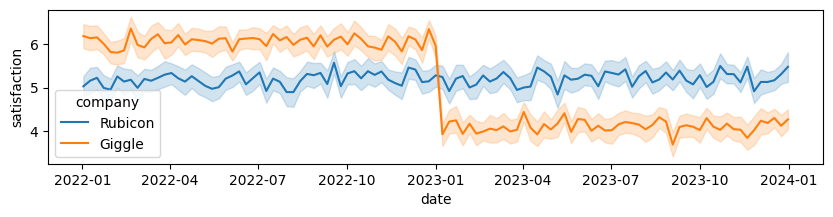

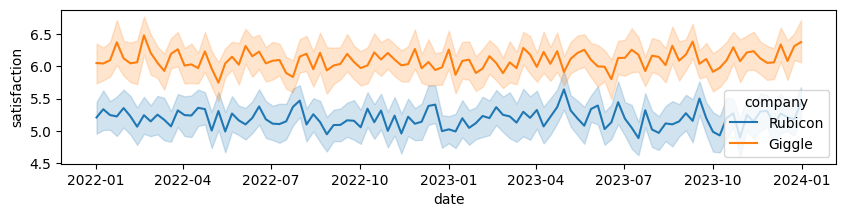

In [62]:
plot_did(remote_work_treatment_effect=4)

plot_did(remote_work_treatment_effect=1)

plot_did(remote_work_treatment_effect=-2)

plot_did(remote_work_treatment_effect=0)

### Data Simulation Challenge 2: onset date
Edit the code above to **change the onset of the treatment effect** (the impact of remote work). You can also explore the different timing intervals for the date window. Currently the code simulates weekly reporting (the `W` argument in the `daterange` function), but there [are other intervals you could use](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases) if you would like to explore this.  

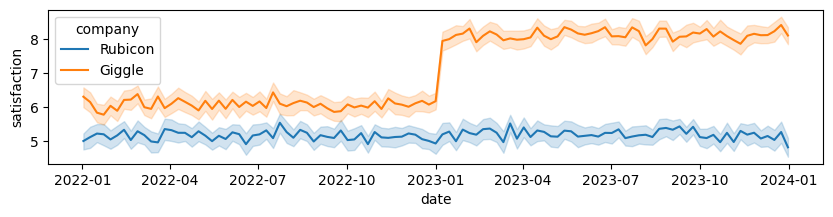

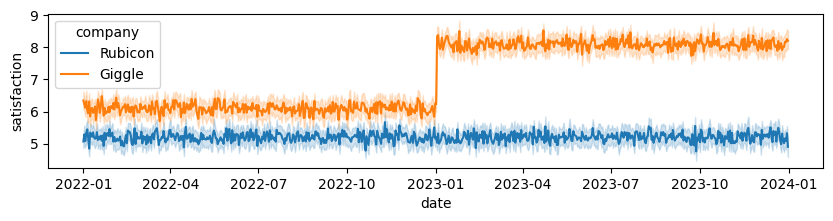

In [63]:
plot_did(frequency='W')

plot_did(frequency='D')

## Analysing the Simulated Dataset
Let's perform a Difference in Differences analysis on the simulated dataset. DiD analyses can be formulated as a simple regression model. We'll use the [statsmodels](https://www.statsmodels.org/stable/index.html) library, which let's you do regressions in python using the same formulae based api that is likely familiar to many people from R. 

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

To perform the analyses, we need to create two binary variables. The first binary variable captures whether the datapoint is before (`0`) or after (`1`) the onset of the treatment. We can use the `remote_work_onset_date` variable to code this, utilizing the datetime functionality of the `date` column as follows:

In [39]:
df['post_treatment'] = (df['date'] > remote_work_onset_date).astype(int)

You might notice that this variable will be `1` even for rows of the dataset where the company is not `Giggle`. That's a little confusing, because only `Giggle` employees received the remote work option. However, it is critical that we have a variable in the model that captures the timepoint. 

The second binary variable will help us addresss the confusing part. The second binary variable captures whether the employee belongs to the company that offered remote work. Or in more generic terms, whether the row reflects the group that received the treatment (`1`) or not (`0`). 

In [40]:
# Create the treatment_group variable
df['treatment_group'] = (df['company'] == 'Giggle').astype(int)

In [41]:
df.sample(10)

,date,company,satisfaction,employee_id,post_treatment,treatment_group
51743,2022-11-01,Giggle,6.049662,G43,0,1
39599,2022-03-03,Giggle,7.349468,G49,0,1
69912,2023-10-31,Giggle,8.950082,G12,1,1
42175,2022-04-24,Giggle,7.365081,G25,0,1
20825,2023-02-21,Rubicon,6.582274,R25,1,0
47749,2022-08-13,Giggle,5.017935,G49,0,1
33222,2023-10-27,Rubicon,4.228076,R22,1,0
44810,2022-06-16,Giggle,6.340099,G10,0,1
21355,2023-03-04,Rubicon,5.004866,R5,1,0
8662,2022-06-23,Rubicon,3.583231,R12,0,0


Finally, to express the DiD analysis as a regression, we need to create an interaction term to add to our regression model. Using a formula allows us to do this easily.

Here's the regression model we will consider:

*  Dependent variable (outcome): `satisfaction`
*  Independent variable (predictor) 1: `post_treatment`
*  Independent variable (predictor) 2: `treatment_group`
*  Independent variable (predictor) 3: the **interaction** between `post_treatment` and `post_treatment`. The syntax for an interaction term is `post_treatment*treatment_group`.

So our model formula is:

In [42]:
formula = 'satisfaction ~ post_treatment + treatment_group + post_treatment*treatment_group'

And now we can fit our model:

In [43]:
model = smf.ols(formula, data=df).fit()

We can inspect the results by printing the model summary, which will print a standard regression table (explained below).

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                 3.403e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:46:07   Log-Likelihood:            -1.0387e+05
No. Observations:               73000   AIC:                         2.077e+05
Df Residuals:                   72996   BIC:                         2.078e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [109]:
def model_summary(remote_work_treatment_effect=2, frequency='W', satisfactions=[5.2,6.1], satisfaction_variance=1, onset_date='2023-01-01', num_employees=[50,50]):
    df = create_company_profiles(remote_work_treatment_effect, frequency, satisfactions, satisfaction_variance, onset_date, num_employees)

    df['post_treatment'] = (df['date'] > remote_work_onset_date).astype(int)
    df['treatment_group'] = (df['company'] == 'Giggle').astype(int)
    formula = 'satisfaction ~ post_treatment + treatment_group + post_treatment*treatment_group'
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

model_summary()

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4836.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:37:07   Log-Likelihood:                -14916.
No. Observations:               10500   AIC:                         2.984e+04
Df Residuals:                   10496   BIC:                         2.987e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Understanding the regression results

To understand the results, we need to look at the coefficient estimates for the different terms in the model. 

The key variable is the interaction term `post_treatment*treatment_group`. You can see the coeficient estimate for this term in the `coef` column. Is it different than 0 (which would me it has no effect)? 

You can also look at the colum `P>|t|` to underestand the statistical significance. Supposing your alpha value for decidiing statistical statistical significance is `0.05`, you would look at the value in the `P>|t|` column and see if it is smaller than `0.05` on the relevant row. If you observe a regression coefficient estimate that is statistically significiantly different than zero, you can conclude that the variable has an effect on satisfaction.

*  The results for the `treatment_group` variable tell you whether being in the group that received the treatment is assosciated with higher (positive coefficient estimate) or lower (negative coefficient estimate) satisfaction overall.
*  The results for the `post_treatment` variable tell you whether being in the time period after the treatment is assosciated with higher (positive coefficient estimate) or lower (negative coefficient estimate) satisfaction overall.
*  The results for the `post_treatment*treatment_group` interaction term criticially capture the effect of the treatment, because this term captures the variance that is unique to the scores that were generated by the group who received the treatment in the time period after the treatment. This tells you whether remote work is assosciated with higher (positive coefficient estimate) or lower (negative coefficient estimate) satisfaction.



## Data Analysis Challenge 1: treatment effect
Regenerate the dataset with **different levels of treatment effect** (the impact of remote work). Change the relevant variable, re-reun the data simulation and analysis, and examine whether the regression results accurately reflect the true effect size. Try making the treatment effect:
*   Stronger
*   Weaker
*   Negative
*   Null (i.e. no effect)

Basically, do the same thing you did in data simulation challenge 1, but examine the consequences using regression results. 


In [64]:
model_summary(remote_work_treatment_effect=4)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                 1.400e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:07:39   Log-Likelihood:                -14977.
No. Observations:               10500   AIC:                         2.996e+04
Df Residuals:                   10496   BIC:                         2.999e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [65]:
model_summary(remote_work_treatment_effect=1)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     2201.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:08:09   Log-Likelihood:                -14978.
No. Observations:               10500   AIC:                         2.996e+04
Df Residuals:                   10496   BIC:                         2.999e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [66]:
model_summary(remote_work_treatment_effect=-2)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     1663.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:08:15   Log-Likelihood:                -14959.
No. Observations:               10500   AIC:                         2.993e+04
Df Residuals:                   10496   BIC:                         2.995e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [67]:
model_summary(remote_work_treatment_effect=0)

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     718.6
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:08:19   Log-Likelihood:                -14762.
No. Observations:               10500   AIC:                         2.953e+04
Df Residuals:                   10496   BIC:                         2.956e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Data Analysis Challenge 2: baseline satisfaction levels
Edit the **baseline levels of saisfaction** for the two companies. Regenreate the datset a few times with larger or smaller differences in average satisfaction (in the company profiles). Is the regression analysis able to pick up the true effect size of the treatment in a way that is robust to these differences? Can the regression accurately detect the underlying differences in average saistifaction? 

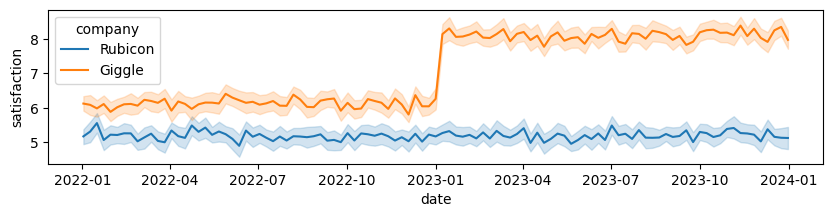

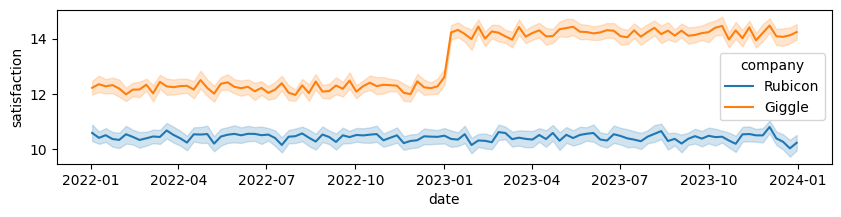

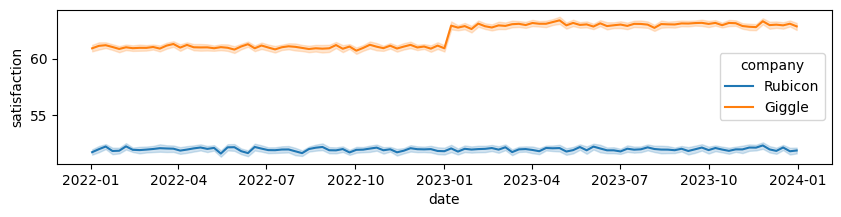

In [68]:
plot_did(satisfactions=[5.2, 6.1])

plot_did(satisfactions=[10.4, 12.2])

plot_did(satisfactions=[52, 61])

In [69]:
model_summary(satisfactions=[10.4, 12.2])

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4865.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:10:28   Log-Likelihood:                -14836.
No. Observations:               10500   AIC:                         2.968e+04
Df Residuals:                   10496   BIC:                         2.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Data Analysis **Bonus** Challenge: Explore additional variables
Explore variations in the following variables. Your goal is to gain a sense for whether there are circumstances in which the regression analysis is better or worse at detecting the true underlying effect size of the remote work treatment. Explore variaitons in the following variables, generate the simulated datasets multiple times for each variable setting, and see how the regression results change.

*  explore the consequences of varying the noise parameter used to sample satisfaction scores, relative to the underlying baseline average satisfaction scores

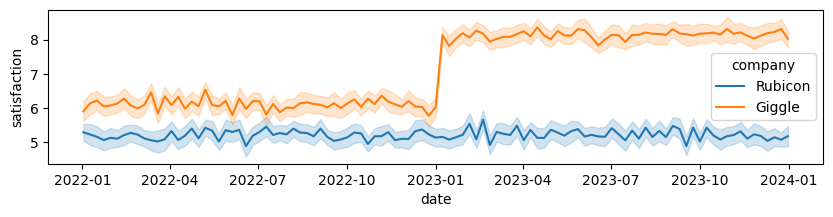

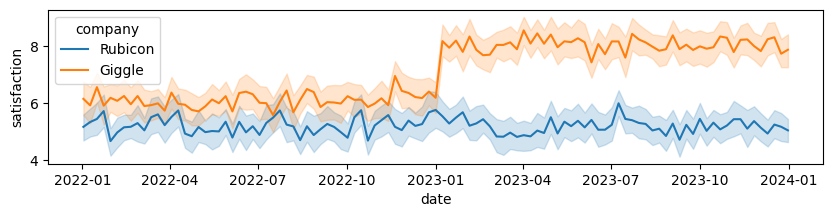

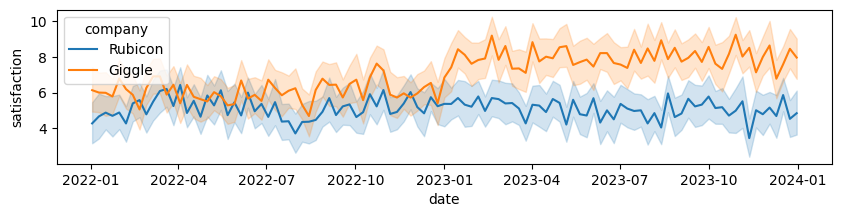

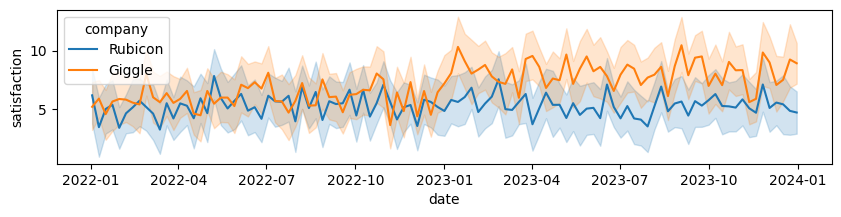

In [91]:
plot_did(satisfaction_variance=1)

plot_did(satisfaction_variance=2)

plot_did(satisfaction_variance=4)

plot_did(satisfaction_variance=8)

*  explore the consequences of varying the onset time for the treatment (i.e. more recent onset)

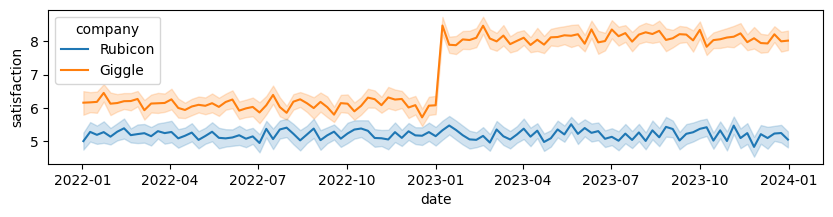

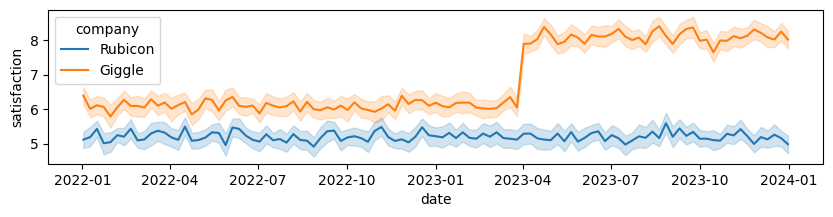

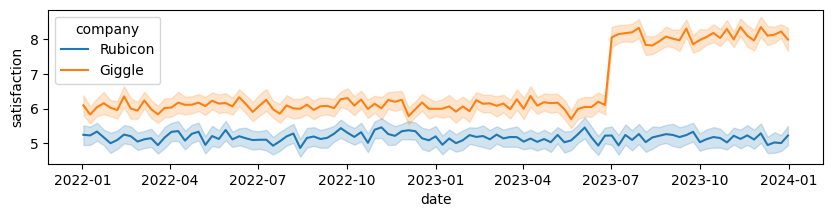

In [97]:
plot_did(onset_date='2023-01-01')

plot_did(onset_date='2023-04-01')

plot_did(onset_date='2023-07-01')

*  explore the consequences of simulating different numbers of employees for the two companies (i.e. `Giggle` has few employees in the dataset)

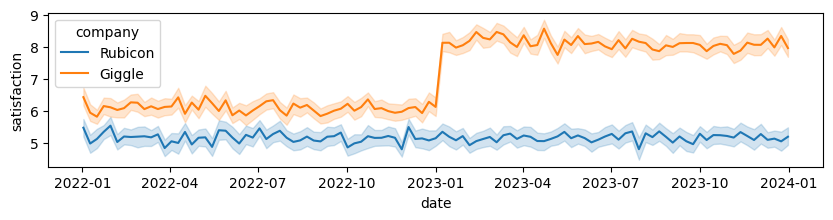

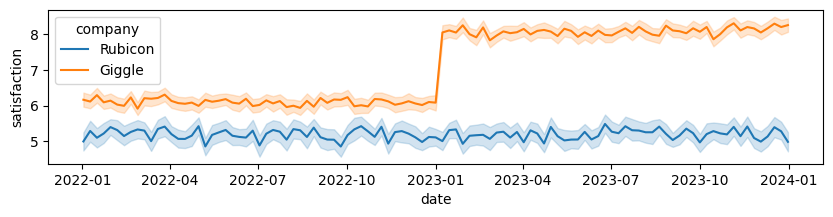

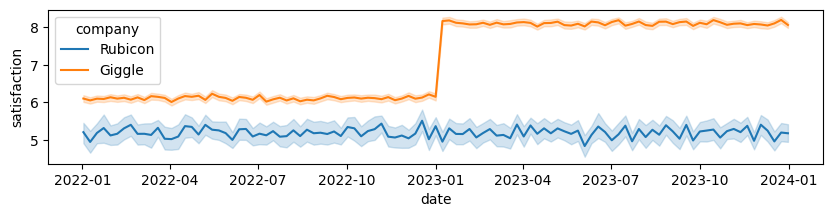

In [112]:
plot_did(num_employees=[50,50])

plot_did(num_employees=[50,100])

plot_did(num_employees=[50,500])

In [110]:
model_summary(num_employees=[50,100])

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     7792.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:37:22   Log-Likelihood:                -22333.
No. Observations:               15750   AIC:                         4.467e+04
Df Residuals:                   15746   BIC:                         4.471e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [111]:
model_summary(num_employees=[50,500])

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                 2.334e+04
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:37:38   Log-Likelihood:                -81792.
No. Observations:               57750   AIC:                         1.636e+05
Df Residuals:                   57746   BIC:                         1.636e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   